In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# parquet 형식의 원본 파일 불러오기

In [3]:
raw = pd.read_parquet("business_data/df_final.parquet.gzip")
raw.shape

(42448763, 8)

In [4]:
# 결측치, 중복값 삭제

raw = raw.dropna().copy()
raw = raw.drop_duplicates().copy()
raw

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-16 12:04:37+00:00,view,7900918,2053013556487520725,furniture.kitchen.chair,joie,102.709999,560842110
1,2019-10-16 12:04:37+00:00,view,1003317,2053013555631882655,electronics.smartphone,apple,952.150024,560842739
2,2019-10-16 12:04:37+00:00,view,2501929,2053013564003713919,appliances.kitchen.oven,asel,61.750000,525817175
3,2019-10-16 12:04:37+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,172.169998,515456548
4,2019-10-16 12:04:37+00:00,cart,1004836,2053013555631882655,electronics.smartphone,samsung,229.410004,529758564
...,...,...,...,...,...,...,...,...
7074788,2019-10-11 17:54:47+00:00,view,3601261,2053013563810775923,appliances.kitchen.washer,bosch,476.119995,515598105
7074789,2019-10-11 17:54:47+00:00,view,2800660,2053013563835941749,appliances.kitchen.refrigerators,dauscher,156.220001,557716137
7074791,2019-10-11 17:54:47+00:00,view,4900396,2053013555220840837,appliances.kitchen.juicer,bosch,101.389999,522609644
7074792,2019-10-11 17:54:47+00:00,view,1801350,2053013554415534427,electronics.video.tv,toshiba,437.510010,505550850


In [5]:
raw.shape

(22146517, 8)

In [6]:
raw.describe()

,product_id,category_id,price,user_id
count,2.214652e+07,2.214652e+07,2.214652e+07,2.214652e+07
mean,5.393490e+06,2.055727e+18,3.527647e+02,5.341126e+08
std,8.393992e+06,1.572512e+16,3.655553e+02,1.869181e+07
min,1.000978e+06,2.053014e+18,0.000000e+00,3.386938e+07
25%,1.004856e+06,2.053014e+18,1.087100e+02,5.160323e+08
50%,1.500399e+06,2.053014e+18,2.184900e+02,5.308120e+08
75%,5.100337e+06,2.053014e+18,4.592100e+02,5.524244e+08
max,6.050001e+07,2.173217e+18,2.574070e+03,5.662807e+08


In [7]:
raw.describe(include="object")

,category_code,brand
count,22146517,22146517
unique,126,1726
top,electronics.smartphone,samsung
freq,9624530,4305995


<AxesSubplot: >

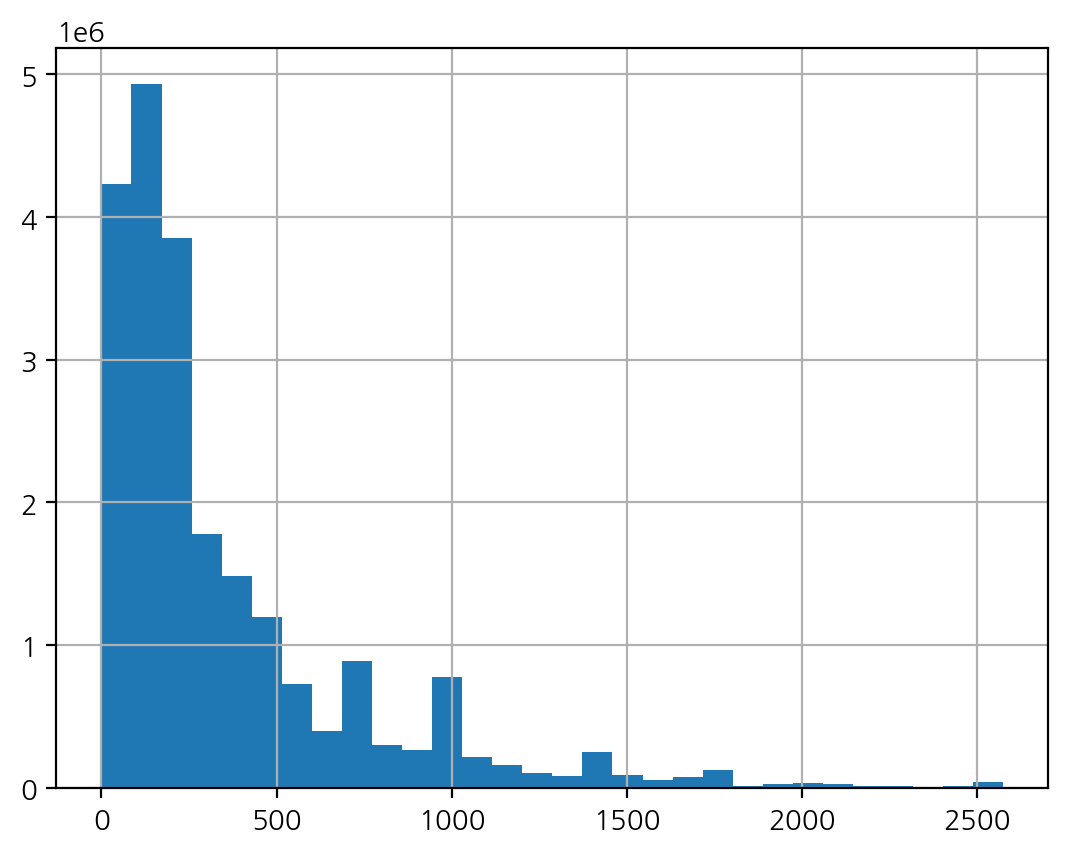

In [8]:
# raw의 이상치 확인 -> 추가 처리 진행은 하지 않음

raw["price"].hist(bins=30)

In [9]:
# 10월에서 12~15일 데이터가 없음

pd.to_datetime(raw["event_time"]).dt.day.value_counts().sort_index()

1     776663
2     758540
3     728801
4     926044
5     845646
6     834723
7     736420
8     782692
9     787872
10    783262
11    788986
16    477816
17    904784
18    945106
19    934214
20    962756
21    889310
22    897071
23    877247
24    843024
25    893648
26    863380
27    887718
28    763447
29    748260
30    742157
31    766930
Name: event_time, dtype: int64

# RFM

## 구매한 내역만 추출하기

In [10]:
df_p = raw[raw["event_type"] == "purchase"].copy()
df_p

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
7,2019-10-16 12:04:38+00:00,purchase,3601438,2053013563810775923,appliances.kitchen.washer,beko,203.410004,512935426
53,2019-10-16 12:04:39+00:00,purchase,1004750,2053013555631882655,electronics.smartphone,samsung,195.619995,560839537
84,2019-10-16 12:04:41+00:00,purchase,1004834,2053013555631882655,electronics.smartphone,samsung,173.389999,545171410
178,2019-10-16 12:04:46+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1424.209961,514778102
193,2019-10-16 12:04:47+00:00,purchase,1801900,2053013554415534427,electronics.video.tv,samsung,483.459991,551965553
...,...,...,...,...,...,...,...,...
7074469,2019-10-11 17:54:34+00:00,purchase,1003235,2053013555631882655,electronics.smartphone,huawei,128.419998,559189082
7074484,2019-10-11 17:54:35+00:00,purchase,1005112,2053013555631882655,electronics.smartphone,apple,1003.849976,512404459
7074507,2019-10-11 17:54:35+00:00,purchase,1005115,2053013555631882655,electronics.smartphone,apple,1003.849976,540273893
7074511,2019-10-11 17:54:36+00:00,purchase,1002524,2053013555631882655,electronics.smartphone,apple,566.960022,533409964


## RFM 계산하기

In [11]:
# 전체 주문에서 최근 주문일 구하기

last_timestamp = df_p["event_time"].max() + dt.timedelta(days=1)
df_p["event_time"].max(), last_timestamp

(Timestamp('2019-10-31 23:59:16+0000', tz='UTC'),
 Timestamp('2019-11-01 23:59:16+0000', tz='UTC'))

In [12]:
# 고객별 R, F, M 값 구하기
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액

rfm = df_p.groupby("user_id").agg({"event_time": lambda x : (last_timestamp - x.max()).days,
                                  "product_id":"count",
                                  "price":"sum"})
rfm

,event_time,product_id,price
user_id,,,
384989212,14,1,41.439999
401021311,11,1,231.639999
403013066,14,2,807.160034
410333972,1,1,591.250000
415873351,1,2,263.059998
...,...,...,...
566265448,1,1,592.010010
566267483,1,2,30.740000
566270060,1,2,147.419998


In [13]:
# RFM 컬럼명 변경

rfm.columns = ["Recency", "Frequency", "MonetaryValue"]
rfm

,Recency,Frequency,MonetaryValue
user_id,,,
384989212,14,1,41.439999
401021311,11,1,231.639999
403013066,14,2,807.160034
410333972,1,1,591.250000
415873351,1,2,263.059998
...,...,...,...
566265448,1,1,592.010010
566267483,1,2,30.740000
566270060,1,2,147.419998


<AxesSubplot: xlabel='Recency', ylabel='count'>

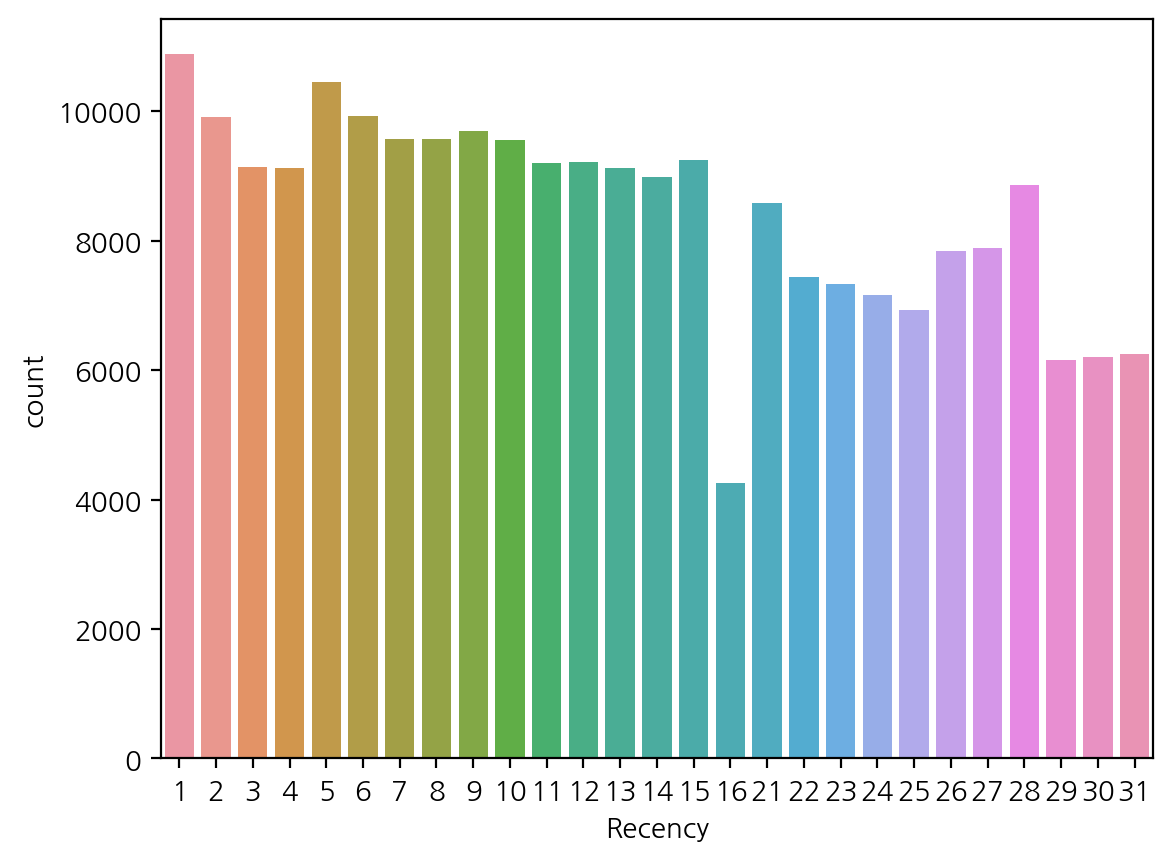

In [14]:
# R(최근 거래일 기준 고객별 최근 구매한 날짜와 차이값) 시각화
# 특이하게도 R값이 비교적 골고루 분포함

sns.countplot(data=rfm, x="Recency")

<AxesSubplot: xlabel='Frequency', ylabel='count'>

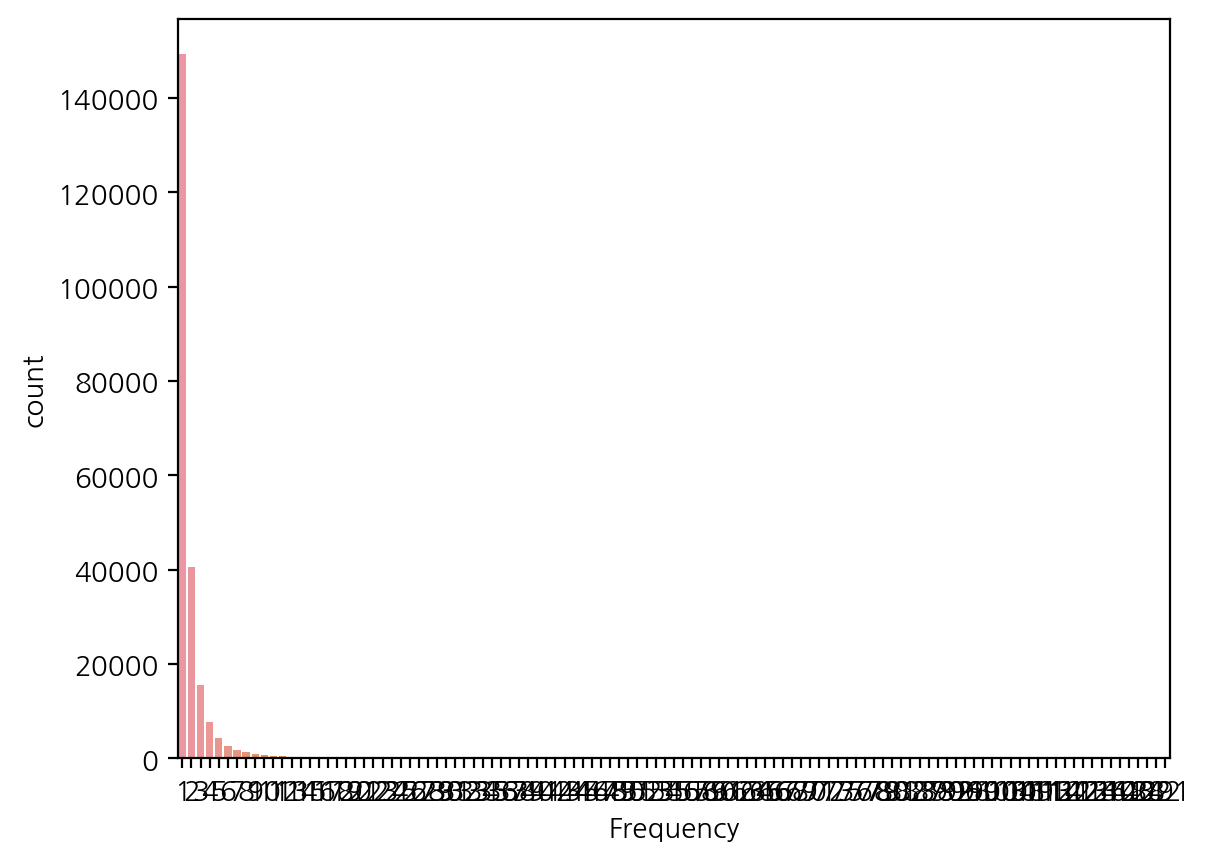

In [15]:
# 구매 횟수별 빈도수 시각화
# 1번 구매한 고객이 압도적으로 많음

sns.countplot(data=rfm, x="Frequency")

## RFM 모형

In [16]:
# Recency 는 최근일수록(값이 작을수록) 높은 점수
# Frequency, MonetaryValue 는 값이 클수록 높은 점수
r_labels = list(range(1, 6))[::-1]
f_labels = list(range(1, 6))
m_labels = list(range(1, 6))
cut_size = 5

In [17]:
# 모든 데이터에 rank()함수를 사용하여 순위를 부여한 후
# 고유한 순위를 기준으로 같은 값이라도 구간별로 할당하는 방식 구현
# 참고 : https://medium.datadriveninvestor.com/valueerror-bin-edges-must-be-unique-71512ff2257d

r_cut = pd.qcut(rfm['Recency'].rank(method="first"), cut_size, r_labels)
f_cut = pd.qcut(rfm['Frequency'].rank(method="first"), cut_size, f_labels)
m_cut = pd.qcut(rfm['MonetaryValue'].rank(method="first"), cut_size, m_labels)

In [18]:
# R, F, M이라는 새로운 컬럼 생성

rfm = rfm.assign(R=r_cut, F=f_cut, M=m_cut)
rfm

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
384989212,14,1,41.439999,3,1,1
401021311,11,1,231.639999,3,1,3
403013066,14,2,807.160034,3,4,4
410333972,1,1,591.250000,5,1,4
415873351,1,2,263.059998,5,4,3
...,...,...,...,...,...,...
566265448,1,1,592.010010,5,4,4
566267483,1,2,30.740000,5,5,1
566270060,1,2,147.419998,5,5,2


In [19]:
# R, F, M 문자를 그대로 붙여 RFM Segment 만들기

rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm.head(1)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
user_id,,,,,,,
384989212,14,1,41.439999,3,1,1,311


In [20]:
# R, F, M 값의 합계로 Score 구하기

rfm["RFM_score"] = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(1)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
384989212,14,1,41.439999,3,1,1,311,5


<AxesSubplot: xlabel='RFM_segment', ylabel='RFM_score'>

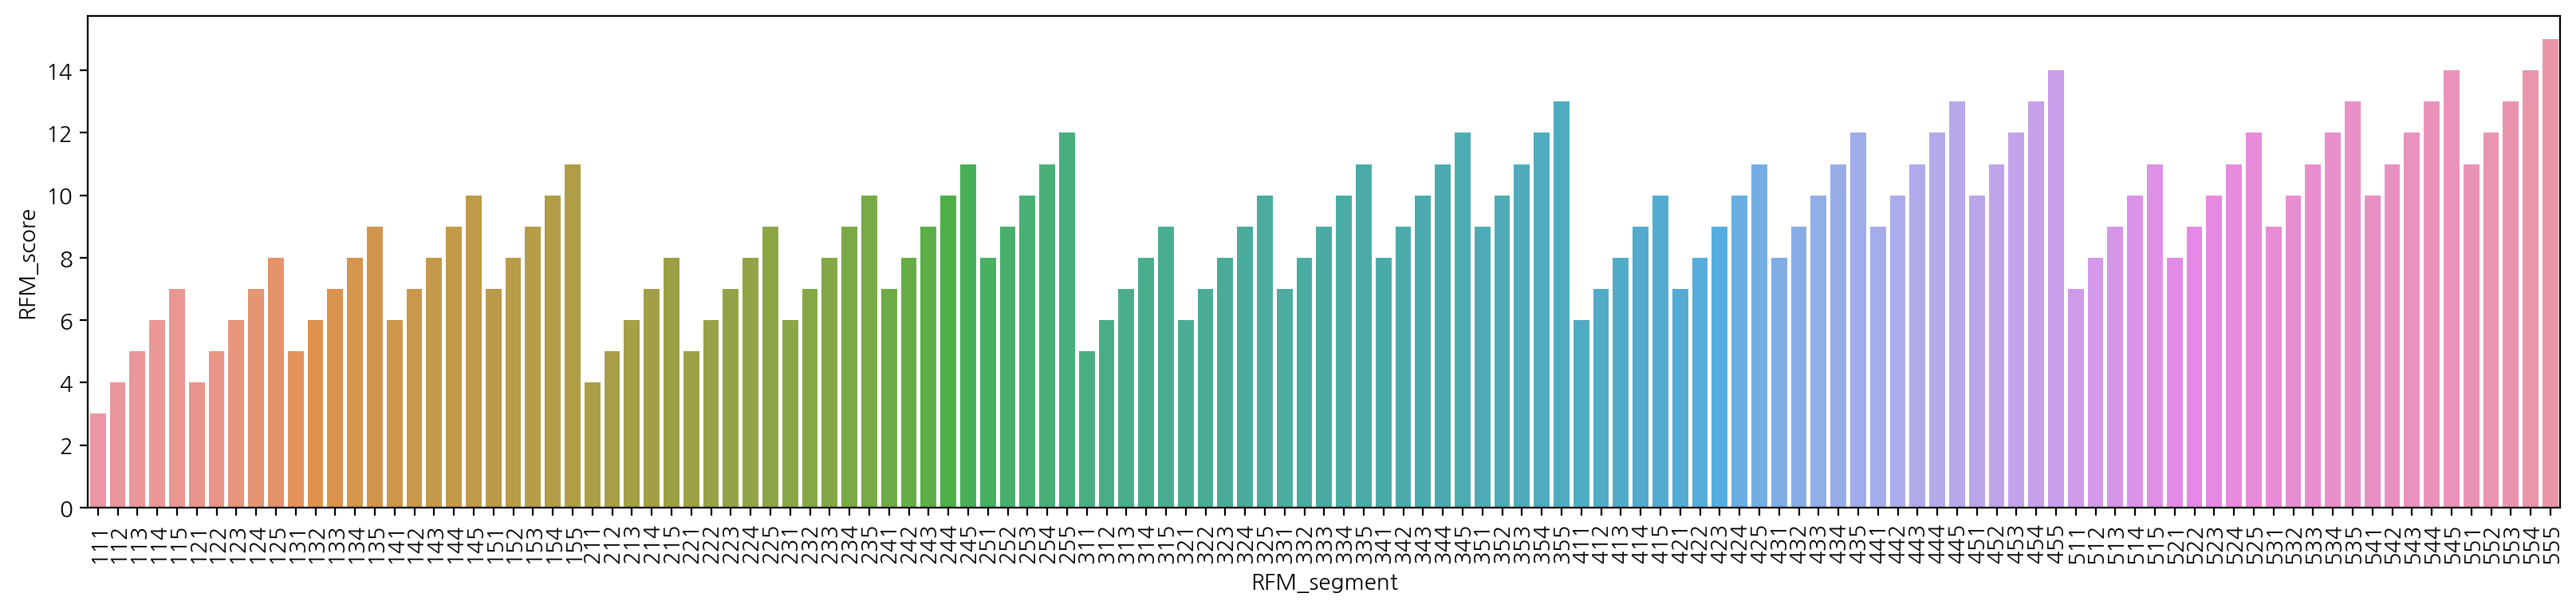

In [21]:
# RFM segment 값에 따라 RFM score 확인

plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score")

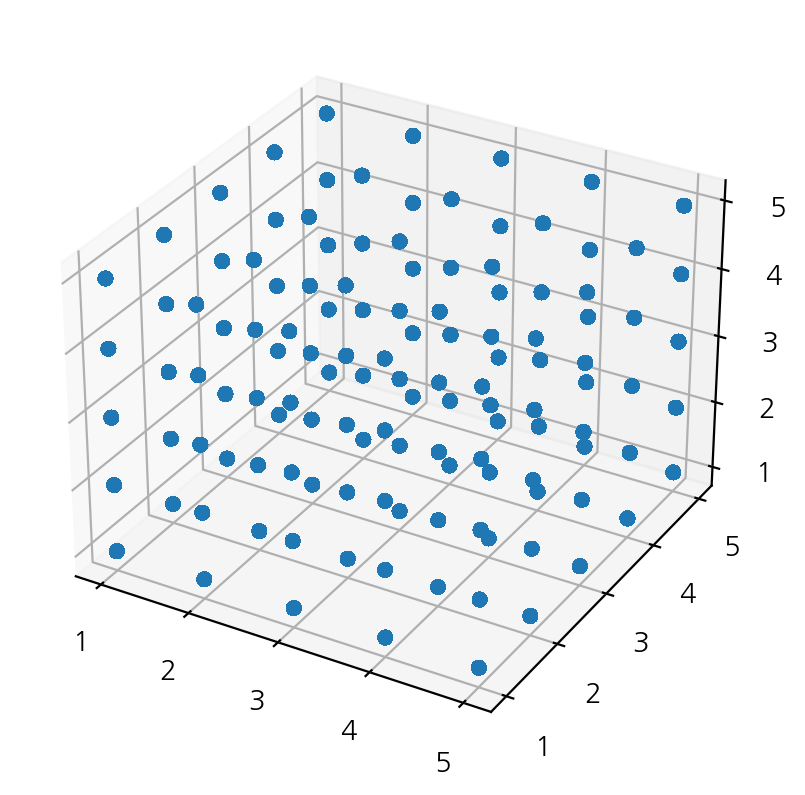

In [22]:
# 구간화가 잘 되었는지 3D로 확인

ax = plt.axes(projection='3d')
ax.scatter3D(rfm["R"], rfm["F"], rfm["M"])

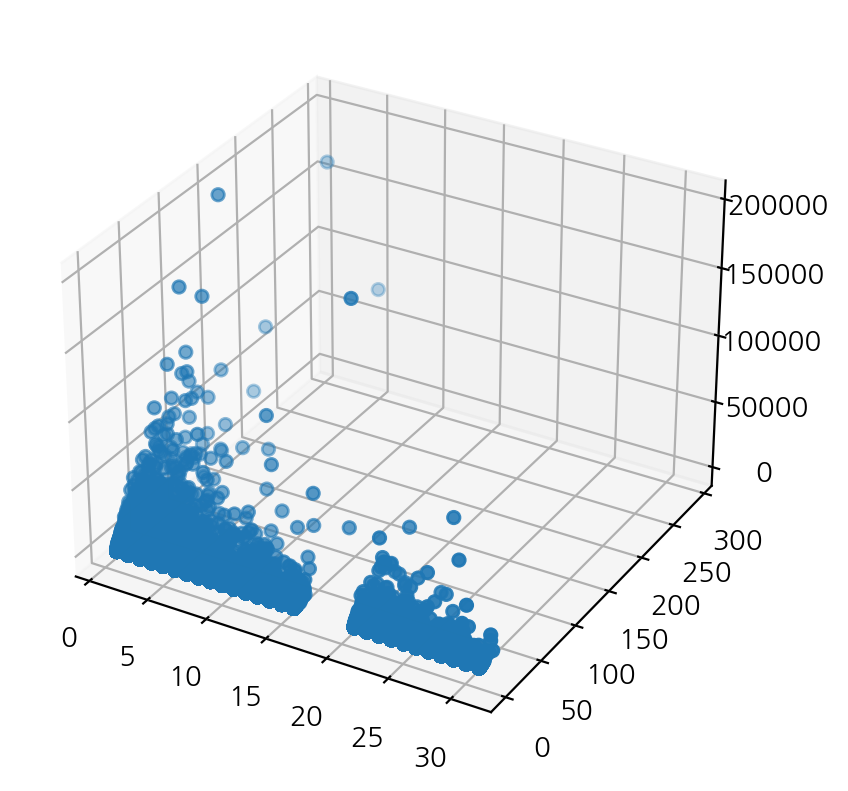

In [23]:
# 구간화 하지 않았을 때와 비교

ax = plt.axes(projection='3d')
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"])

In [24]:
# RFM score를 기준으로 Recency, Frequency, MonetaryValue 집계값 확인

rfm_g = rfm.groupby("RFM_score").agg({"Recency":"mean",
                                      "Frequency":"mean",
                                      "MonetaryValue":["mean", "sum"]
                                     }).style.background_gradient().format("{:,.0f}")
rfm_g

In [25]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나눕니다. 

labels = ["silver", "gold", "platinum"]
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], 3, labels)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
384989212,14,1,41.439999,3,1,1,311,5,silver
401021311,11,1,231.639999,3,1,3,313,7,silver
403013066,14,2,807.160034,3,4,4,344,11,platinum
410333972,1,1,591.250000,5,1,4,514,10,gold
415873351,1,2,263.059998,5,4,3,543,12,platinum


In [26]:
# RFM_score에 따라 RFM_class 값이 잘 나뉘었는지 확인. min-max 확인.

rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,80296.0,5.791359,1.155453,3.0,5.0,6.0,7.0,7.0
gold,75516.0,8.937735,0.816090,8.0,8.0,9.0,10.0,10.0
platinum,72581.0,12.614486,1.371641,11.0,11.0,12.0,14.0,15.0


<AxesSubplot: xlabel='RFM_class', ylabel='RFM_score'>

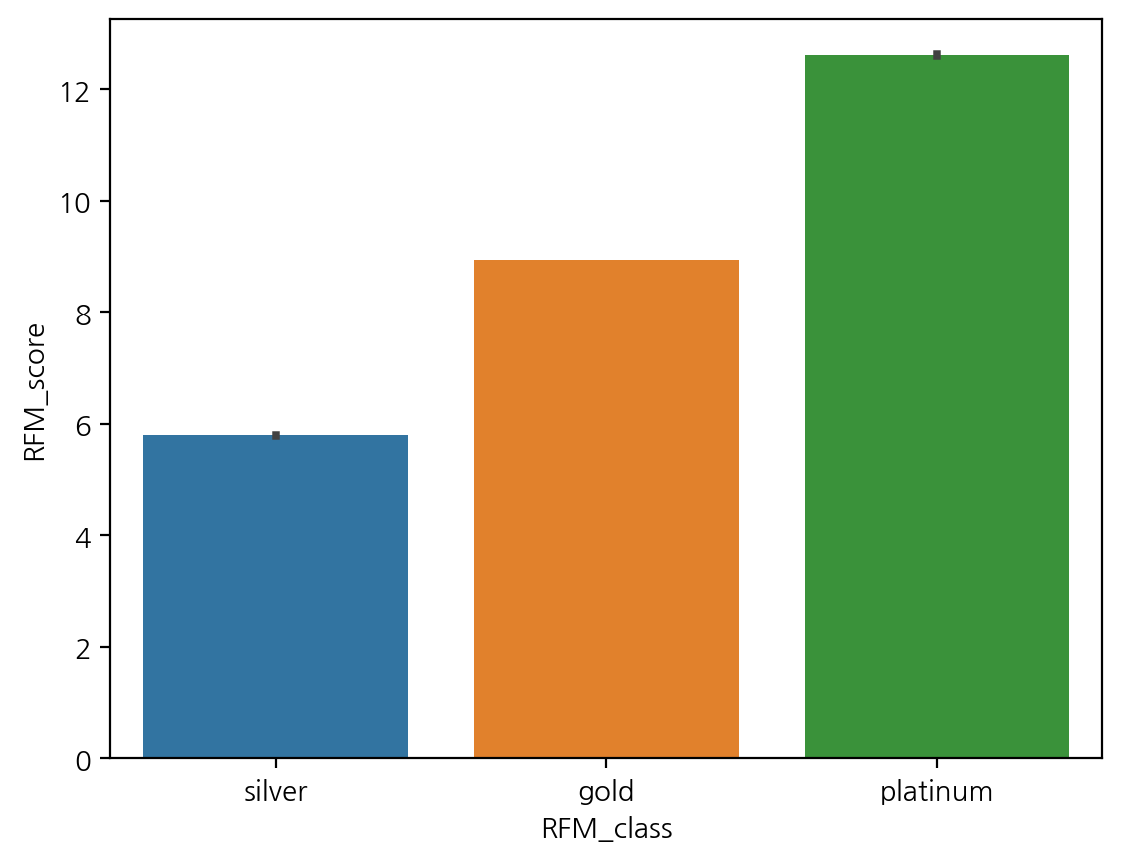

In [27]:
# RFM_class 별 평균 RFM_score 확인(default : 평균)
# barplot

sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot: xlabel='RFM_class', ylabel='RFM_score'>

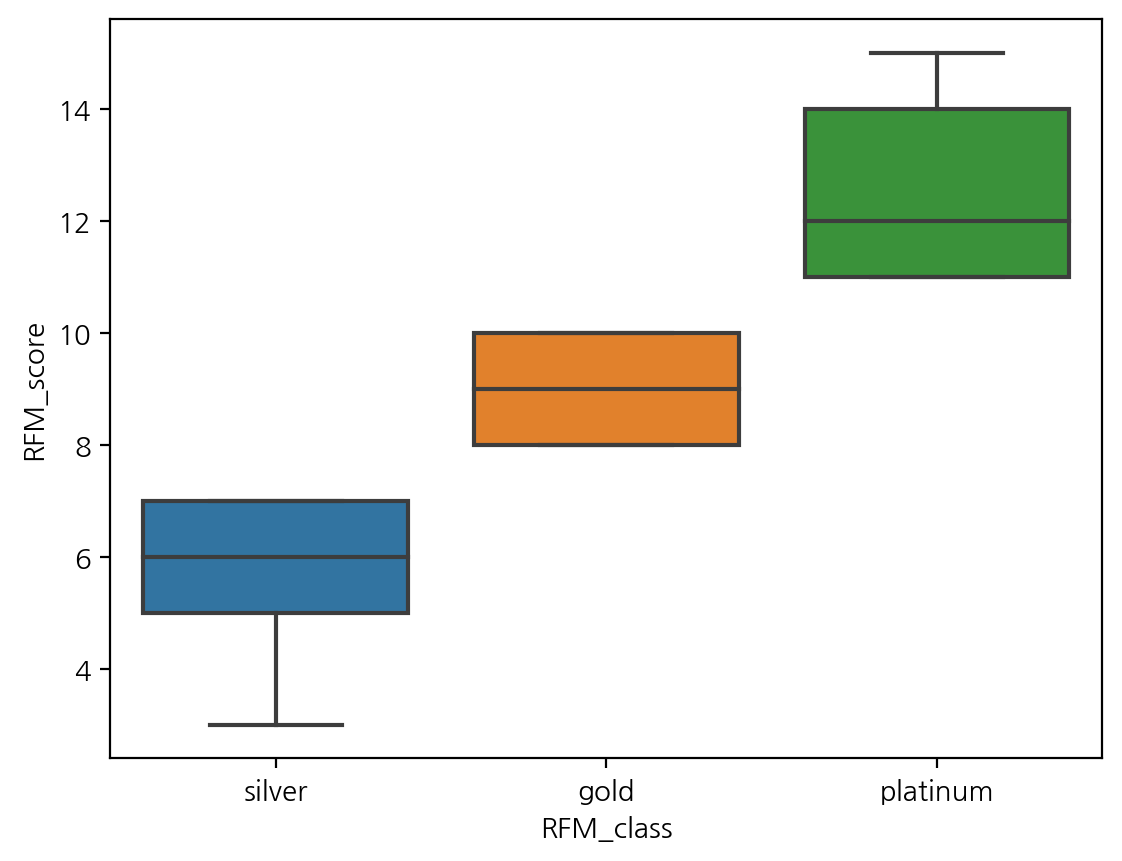

In [28]:
# 같은 내용을 boxplot으로 확인

sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot: xlabel='R', ylabel='RFM_score'>

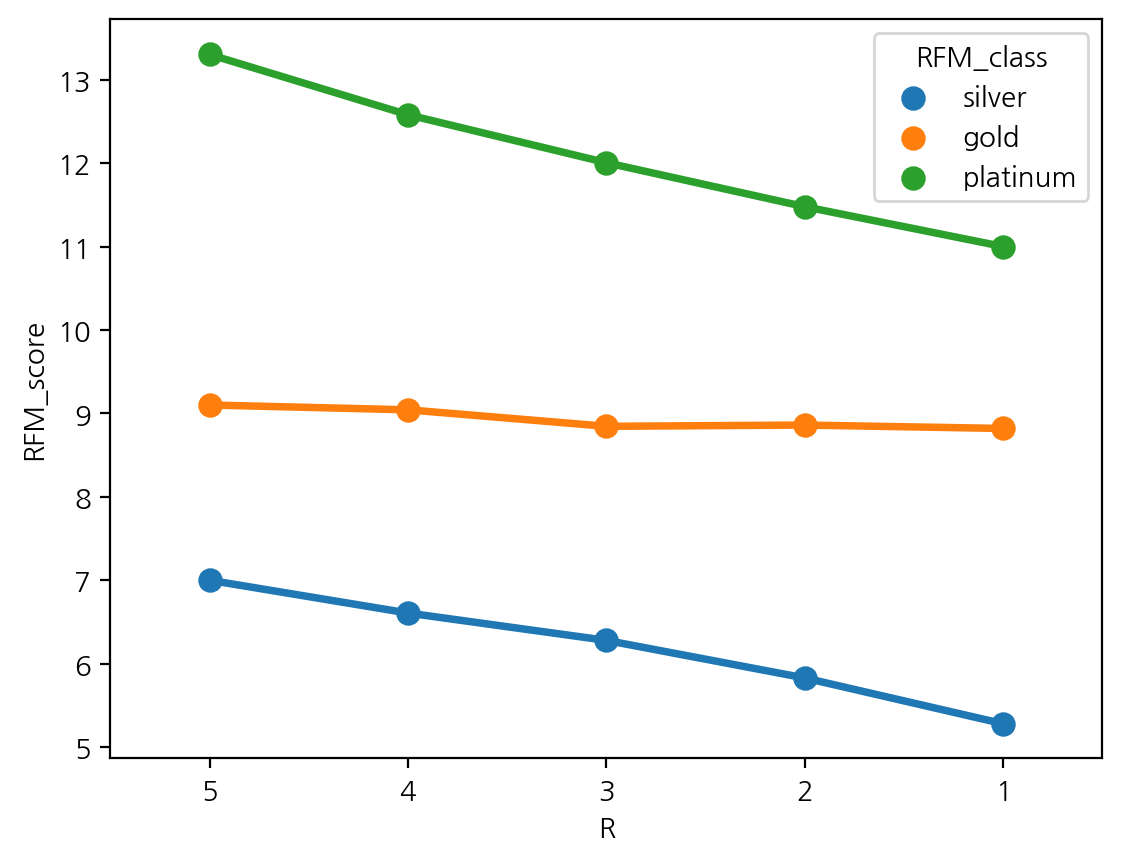

In [29]:
# R을 기준으로 RFM_class가 잘 나뉘어졌는지 확인

sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")

<AxesSubplot: xlabel='F', ylabel='RFM_score'>

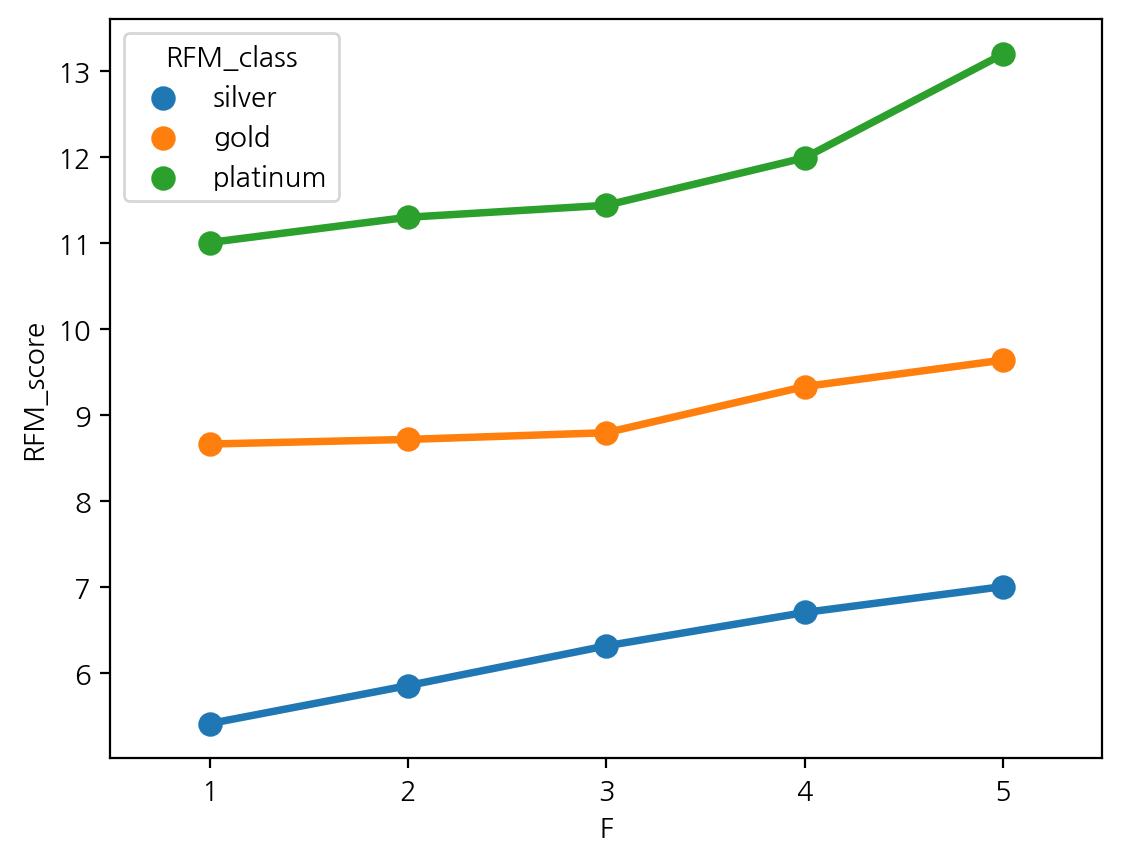

In [30]:
# F을 기준으로 RFM_class가 잘 나뉘어졌는지 확인

sns.pointplot(data=rfm, x="F", y="RFM_score", hue="RFM_class")

<AxesSubplot: xlabel='M', ylabel='RFM_score'>

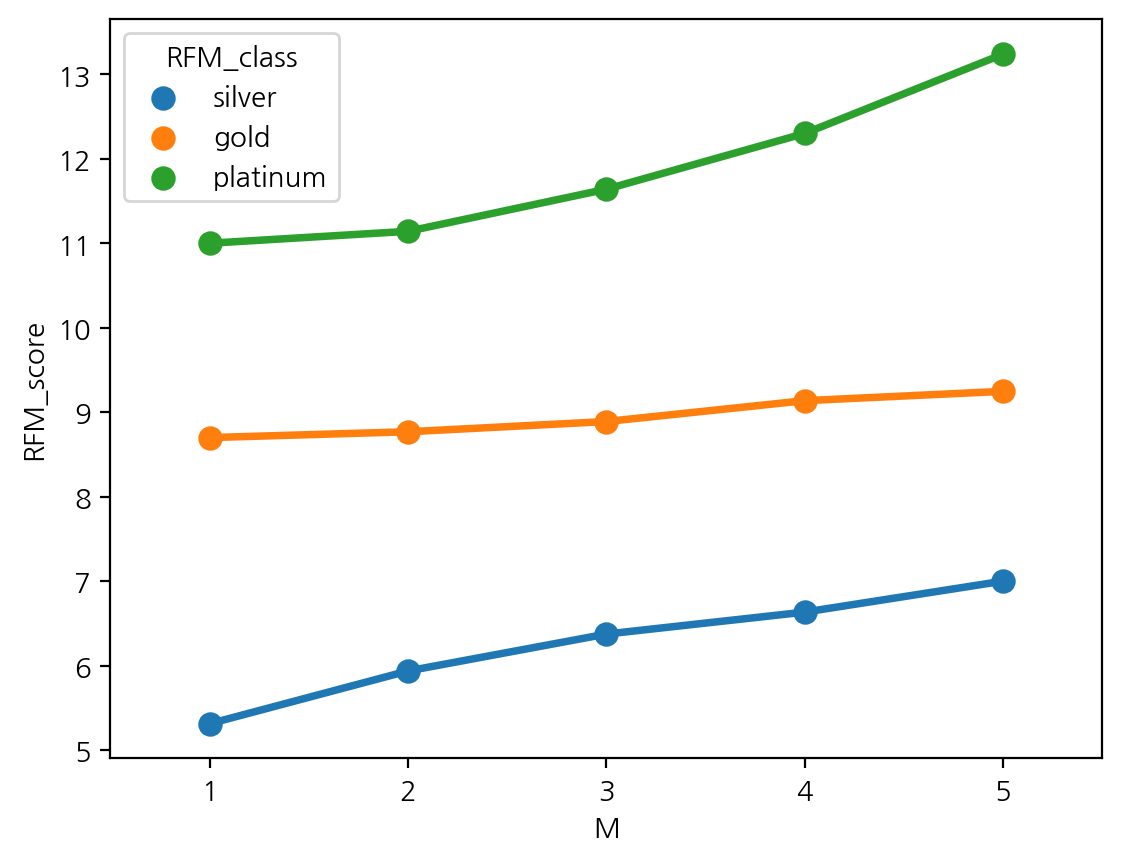

In [31]:
# M을 기준으로 RFM_class가 잘 나뉘어졌는지 확인

sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")

In [32]:
# "RFM_class"를 기준으로 Recency, Frequency, MonetaryValue 확인

rfm_class_g = rfm.groupby("RFM_class").agg({"Recency":"mean",
                                            "Frequency":"mean",
                                            "MonetaryValue":["mean", "sum", "count"]})
rfm_class_g.style.background_gradient().format("{:,.2f}")

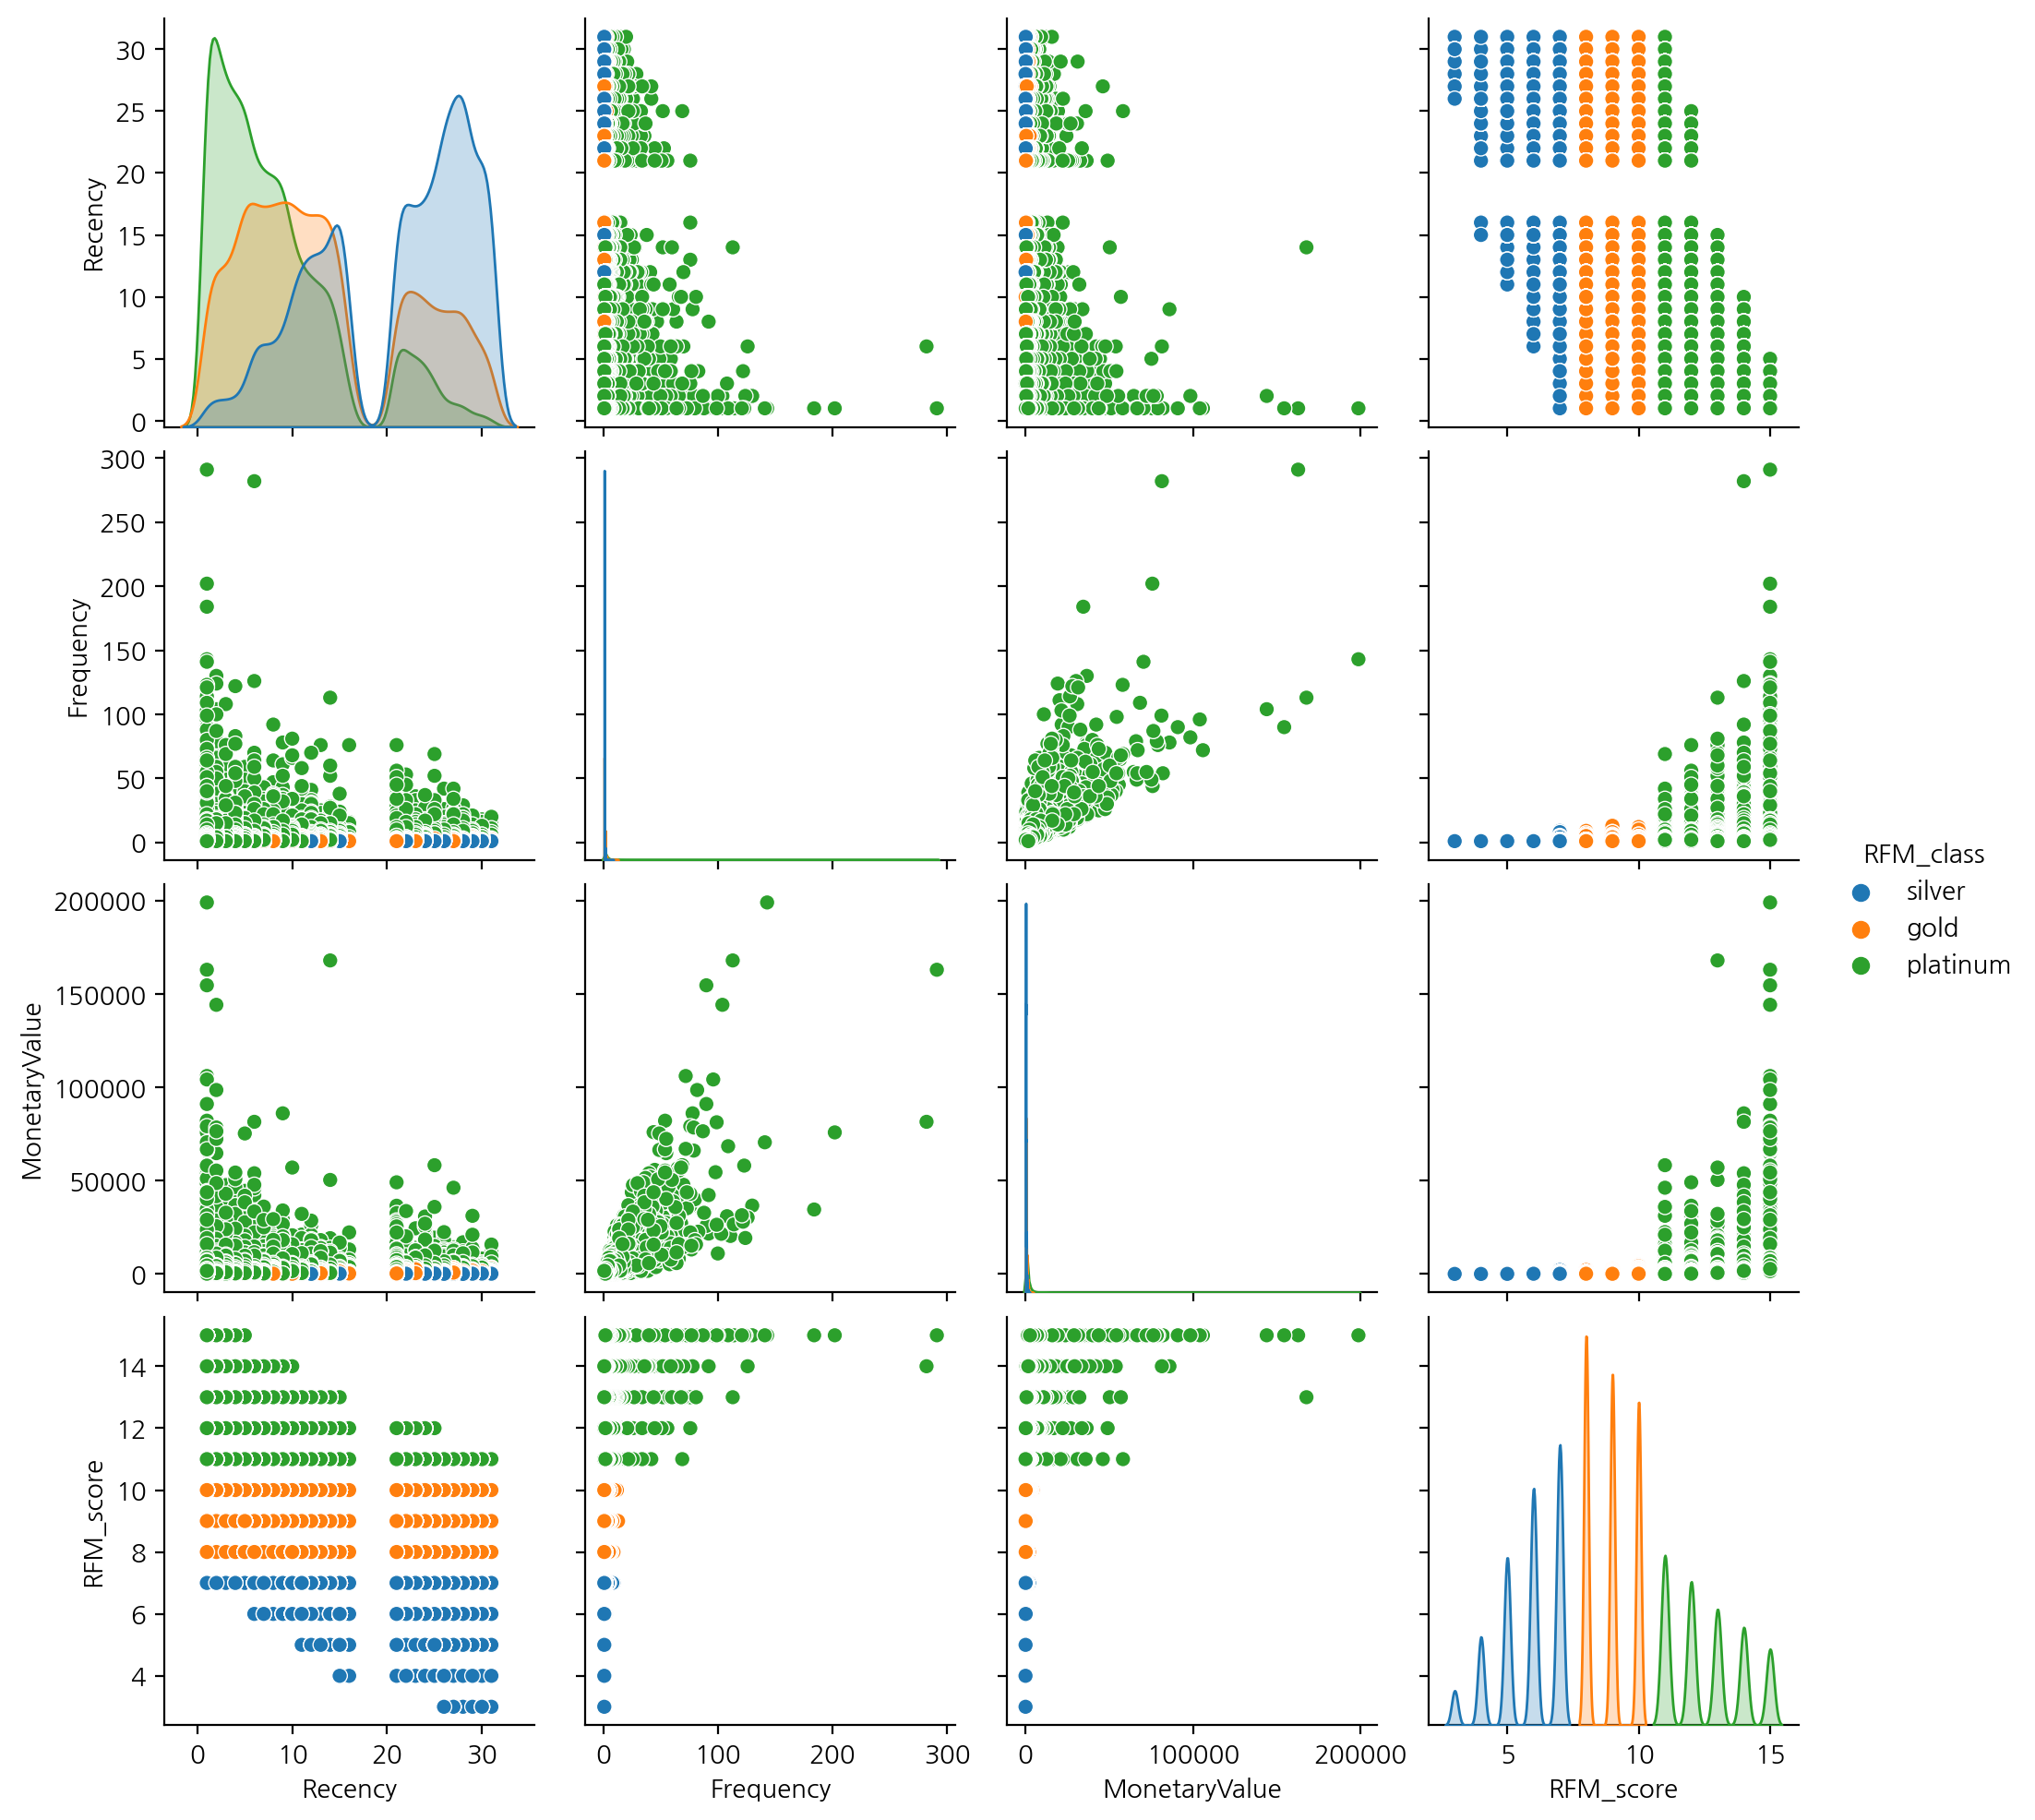

In [33]:
# pairplot으로 "RFM_class" 별로 분포 시각화

sns.pairplot(data=rfm, hue="RFM_class")

In [34]:
# 상관관계 분석

rfm_corr = rfm.corr(numeric_only=True)
rfm_corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.149193,-0.112211,-0.612980
Frequency,-0.149193,1.000000,0.757403,0.408841
MonetaryValue,-0.112211,0.757403,1.000000,0.361757
RFM_score,-0.612980,0.408841,0.361757,1.000000


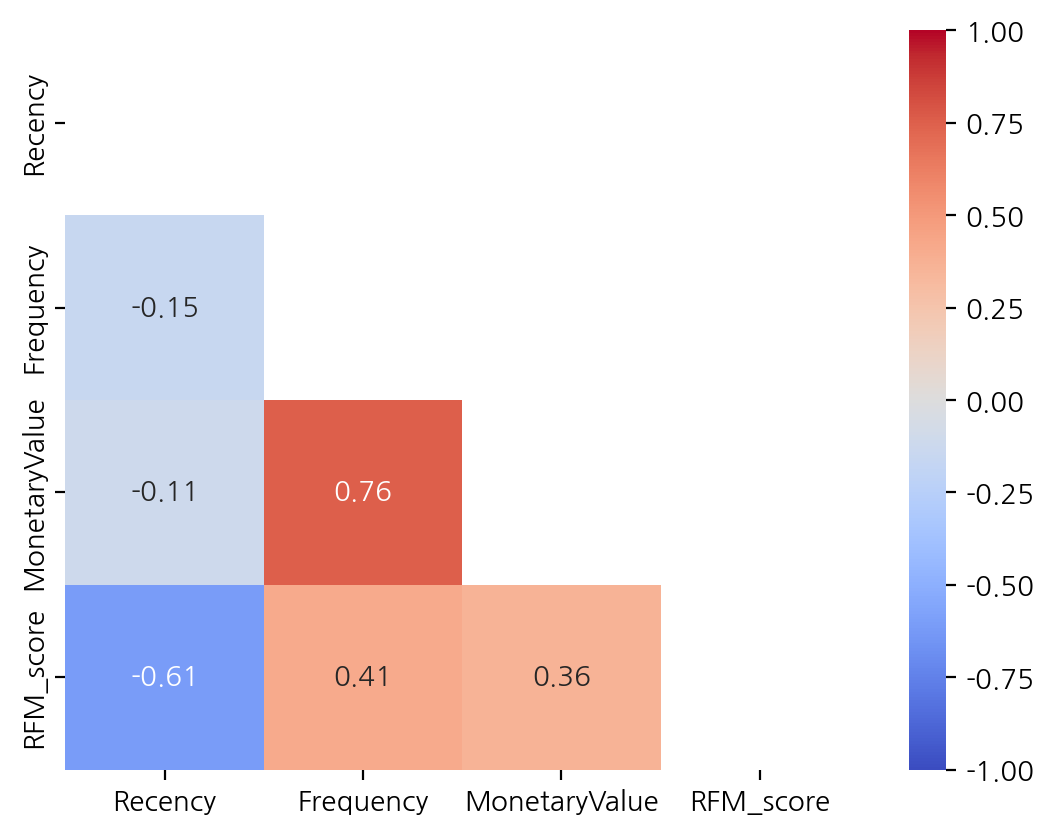

In [35]:
# 히트맵 그리기

mask = np.triu(np.ones_like(rfm_corr))
sns.heatmap(rfm_corr, cmap="coolwarm", annot=True, vmin=-1, vmax=1, mask=mask);

## RFM 분석자료 저장 & 불러오기

In [36]:
# RFM 분석 자료를 parquet으로 저장
rfm.to_parquet("business_data/mini_rfm_final.gzip", compression="gzip")

In [37]:
# 저장된 csv 형태의 RFM 분석 자료를 읽어옵니다. 
rfm = pd.read_parquet("business_data/mini_rfm_final.gzip")
rfm.shape, rfm.head()

((228393, 9),
            Recency  Frequency  MonetaryValue  R  F  M RFM_segment  RFM_score  \
 user_id                                                                        
 384989212       14          1      41.439999  3  1  1         311          5   
 401021311       11          1     231.639999  3  1  3         313          7   
 403013066       14          2     807.160034  3  4  4         344         11   
 410333972        1          1     591.250000  5  1  4         514         10   
 415873351        1          2     263.059998  5  4  3         543         12   
 
           RFM_class  
 user_id              
 384989212    silver  
 401021311    silver  
 403013066  platinum  
 410333972      gold  
 415873351  platinum  )

# Clustering

In [38]:
# Recency, Frequency, MonetaryValue 만 따로 rfm_cluster 변수에 담아 사용

rfm_cluster = rfm.iloc[:, :3]
print(rfm_cluster.shape)
rfm_cluster.head(2)

(228393, 3)


,Recency,Frequency,MonetaryValue
user_id,,,
384989212,14,1,41.439999
401021311,11,1,231.639999


In [39]:
# Frequency, MonetaryValue에 이상치가 있음. mean과 50%확인

rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,228393.000000,228393.000000,228393.000000
mean,14.339691,1.986742,737.289917
std,9.384898,3.243977,2003.170410
min,1.000000,1.000000,0.880000
25%,6.000000,1.000000,143.119995
50%,12.000000,1.000000,285.720001
75%,24.000000,2.000000,730.260010
max,31.000000,291.000000,198916.640625


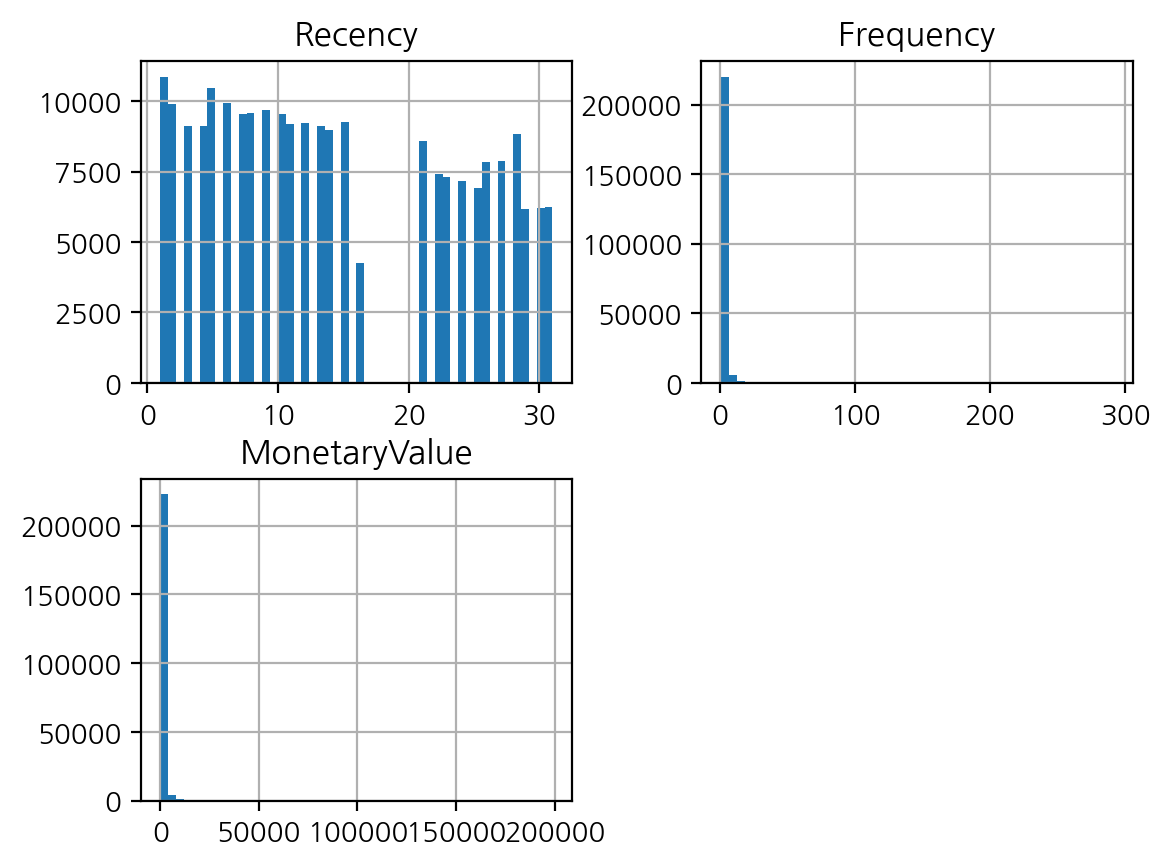

In [40]:
# 한쪽으로 치우친 데이터
# 정규분포로 만들어야 함 -> log 활용

rfm_cluster.hist(bins=50);

## log변환

In [41]:
# rfm_cluster log 변환

rfm_cluster_log = np.log(rfm_cluster + 1)
rfm_cluster_log.head(2)

,Recency,Frequency,MonetaryValue
user_id,,,
384989212,2.708050,0.693147,3.748091
401021311,2.484907,0.693147,5.449492


In [42]:
# 데이터가 잘 정규화되었는지 확인

rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,228393.000000,228393.000000,228393.000000
mean,2.482504,0.944337,5.765843
std,0.774222,0.441100,1.240259
min,0.693147,0.693147,0.631272
25%,1.945910,0.693147,4.970646
50%,2.564949,0.693147,5.658506
75%,3.218876,1.098612,6.594769
max,3.465736,5.676754,12.200646


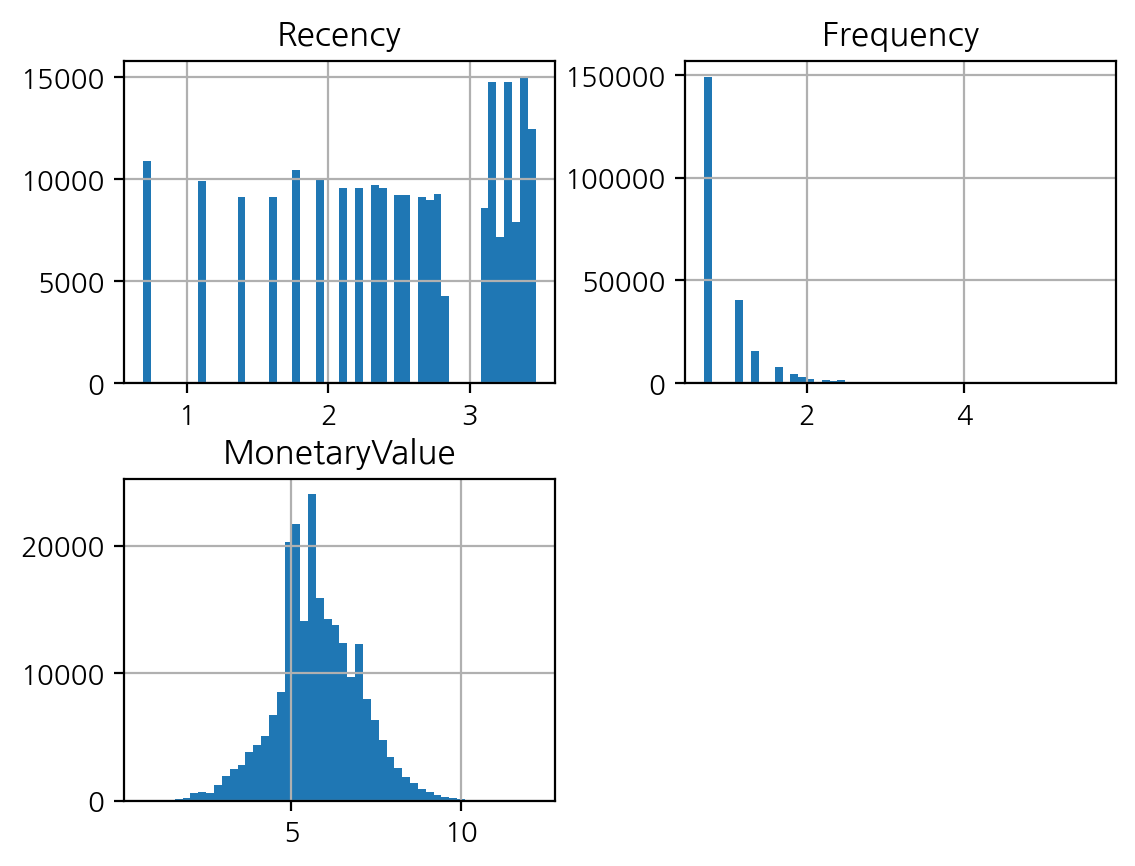

In [43]:
# 전보다 골고루 분포된 모습

rfm_cluster_log.hist(bins=50);

## 스케일 조정

In [44]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 스케일러
ss.fit(rfm_cluster_log) # 평균과 표준편차 학습
X = ss.transform(rfm_cluster_log) # 평균을 0, 표준편차를 1로 변환
X

array([[ 0.29132083, -0.56946415, -1.62675977],
       [ 0.00310372, -0.56946415, -0.25505021],
       [ 0.29132083,  0.34975059,  0.74891461],
       ...,
       [-2.31117221,  0.34975059, -0.61740399],
       [-2.31117221, -0.56946415,  1.48454327],
       [-2.31117221, -0.56946415,  1.33025893]])

In [45]:
pd.DataFrame(X).describe().round(2)

,0,1,2
count,228393.00,228393.00,228393.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.31,-0.57,-4.14
25%,-0.69,-0.57,-0.64
50%,0.11,-0.57,-0.09
75%,0.95,0.35,0.67
max,1.27,10.73,5.19


## K-means

In [49]:
# K-means를 활용해 적절한 군집의 개수 파악하기

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(X)
# kmeans.cluster_centers_, kmeans.inertia_

inertia = [] # 각 군집별 오차의 제곱의 합
silhouettes = []
range_n_clusters = range(2, 20) # 클러스터의 개수 (2개~19개 중 적절한 클러스터의 개수가 뭘까?)

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels=kmeans.labels_))
    print(n_cluster, end=",")

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

## Elbow Method

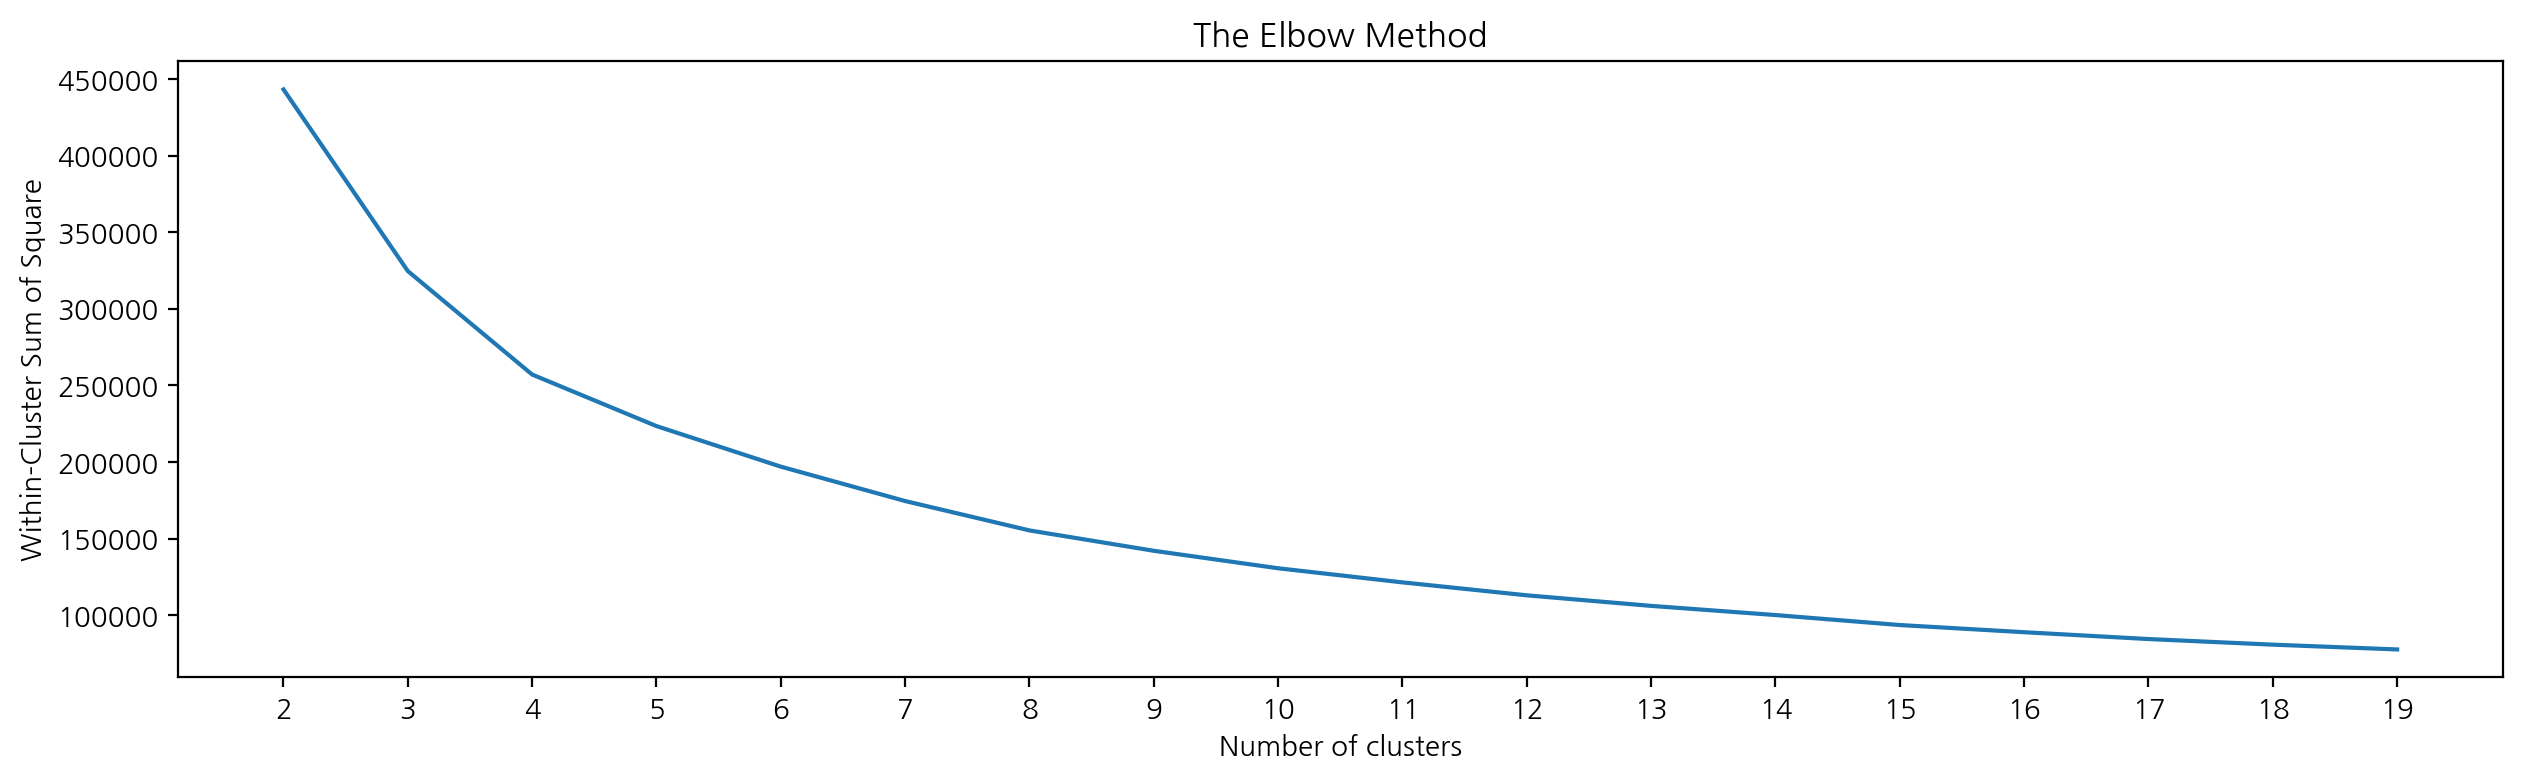

In [50]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia) # k가 증가하면 inertia가 줄어들게 됨
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square') # 각 클러스터 내 관측값의 변동성을 측정하는 척도. 작을수록 더 콤팩트한 클러스터.
plt.xticks(range_n_clusters)
plt.show()

## Silhouette Score

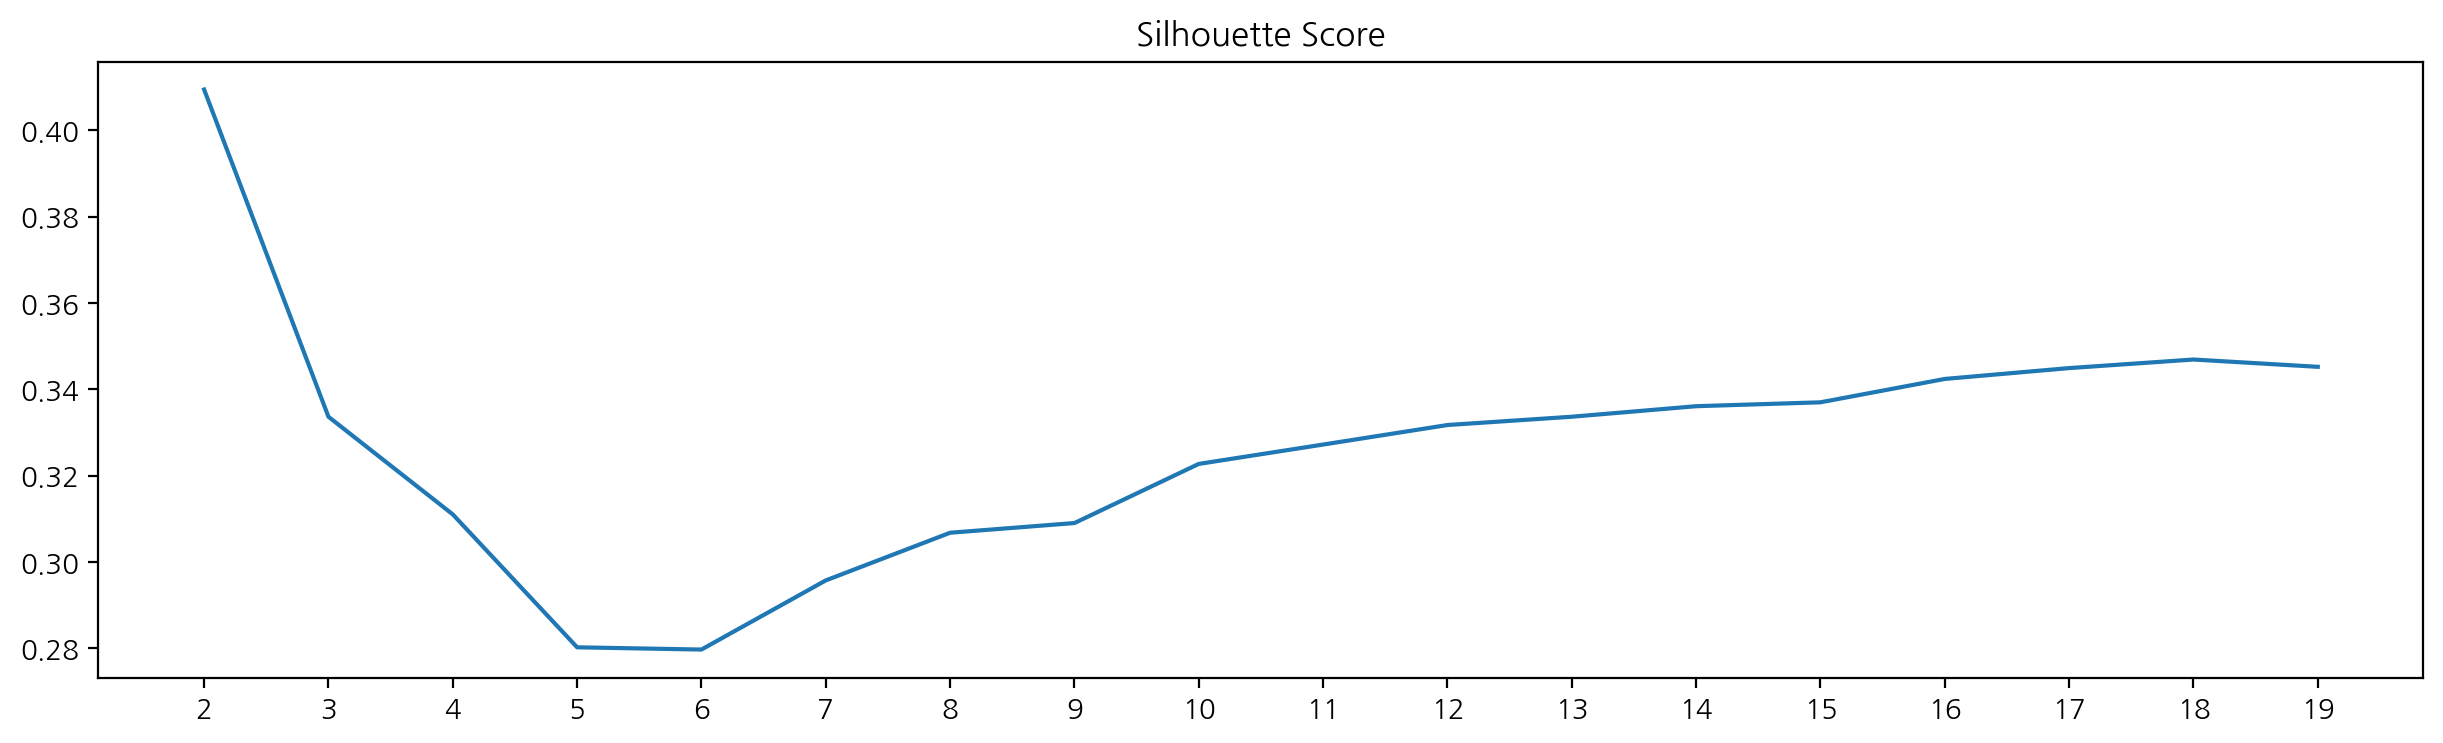

In [51]:
plt.figure(figsize=(15, 4))
plt.title('Silhouette Score')
plt.plot(range_n_clusters, silhouettes)
plt.xticks(range_n_clusters)
plt.show()

## KElbowVisualizer

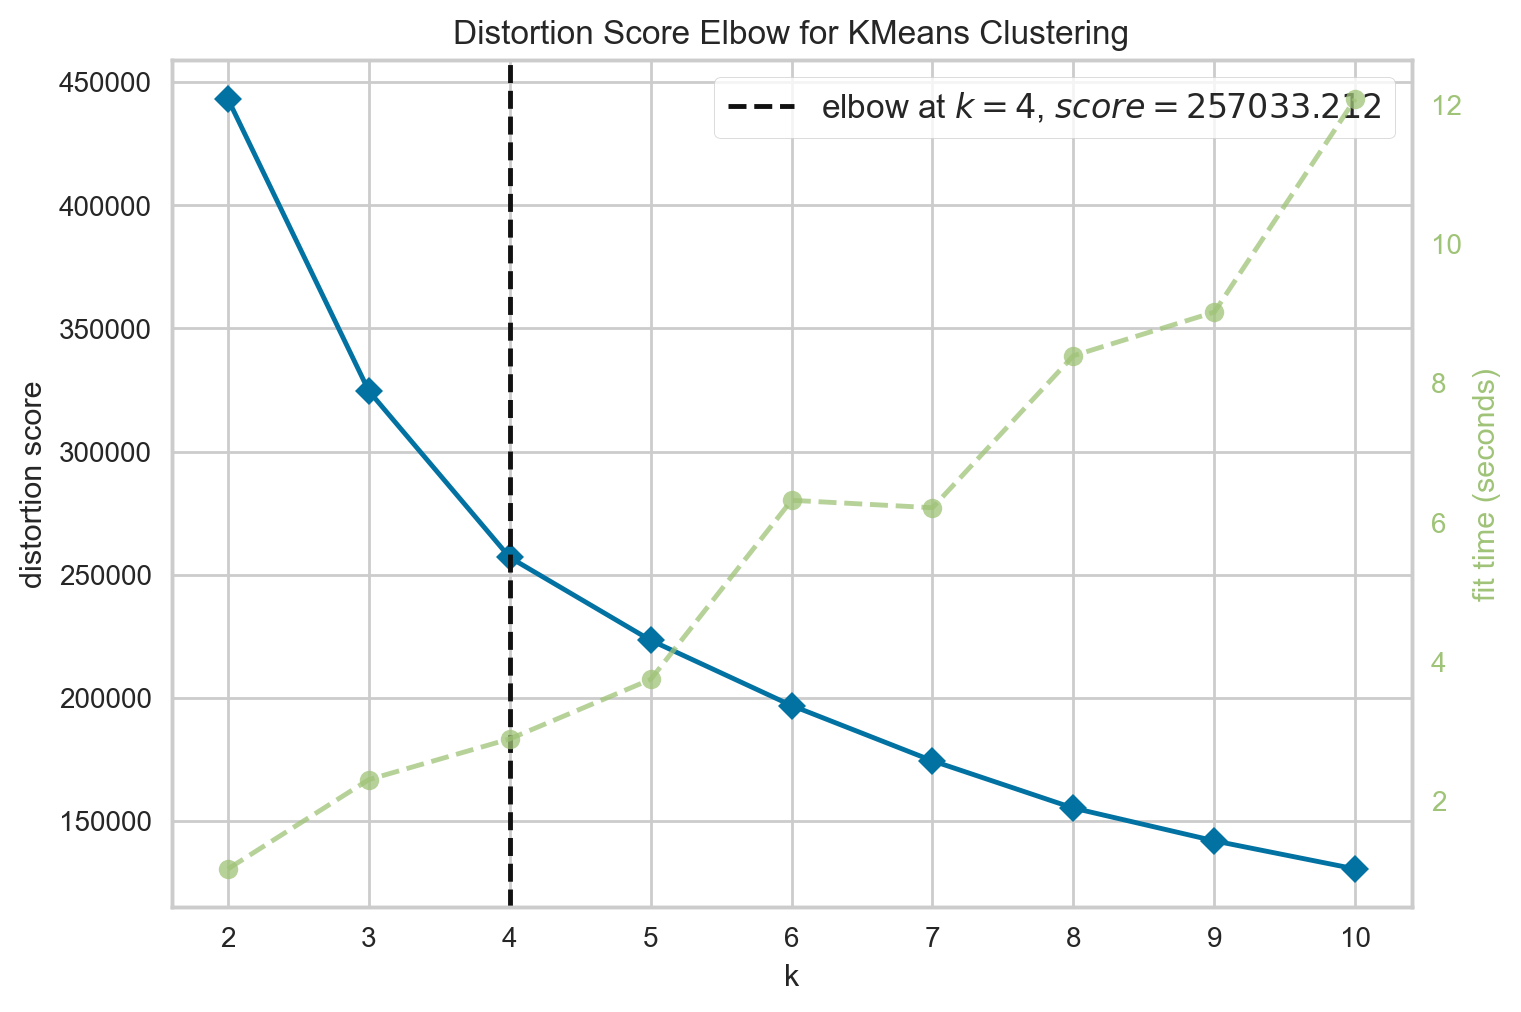

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer

kev = KElbowVisualizer(kmeans, k=10)
kev.fit(X)
kev.show()

## n_clusters = 4로 학습하기

In [53]:
# 클러스터 개수 4개로 학습 진행

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [54]:
# 클러스터마다 몇 개가 속해있는지 확인

pd.Series(kmeans.labels_).value_counts()

1    82882
3    66557
0    55713
2    23241
dtype: int64

In [55]:
# silhouette_score 구하기

silhouette_avg = silhouette_score(X, kmeans.labels_)

KeyboardInterrupt: 

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [56]:
# cluster 컬럼 추가

rfm["Cluster"] = kmeans.labels_
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
user_id,,,,,,,,,,
384989212,14,1,41.439999,3,1,1,311,5,silver,1
401021311,11,1,231.639999,3,1,3,313,7,silver,1


In [57]:
# cluster별로 rfm_class의 분포 확인

pd.crosstab(rfm["RFM_class"], rfm["Cluster"])

Cluster,0,1,2,3
RFM_class,,,,
silver,4702,66581,2,9011
gold,25345,16292,105,33774
platinum,25666,9,23134,23772


<AxesSubplot: xlabel='Cluster', ylabel='RFM_score'>

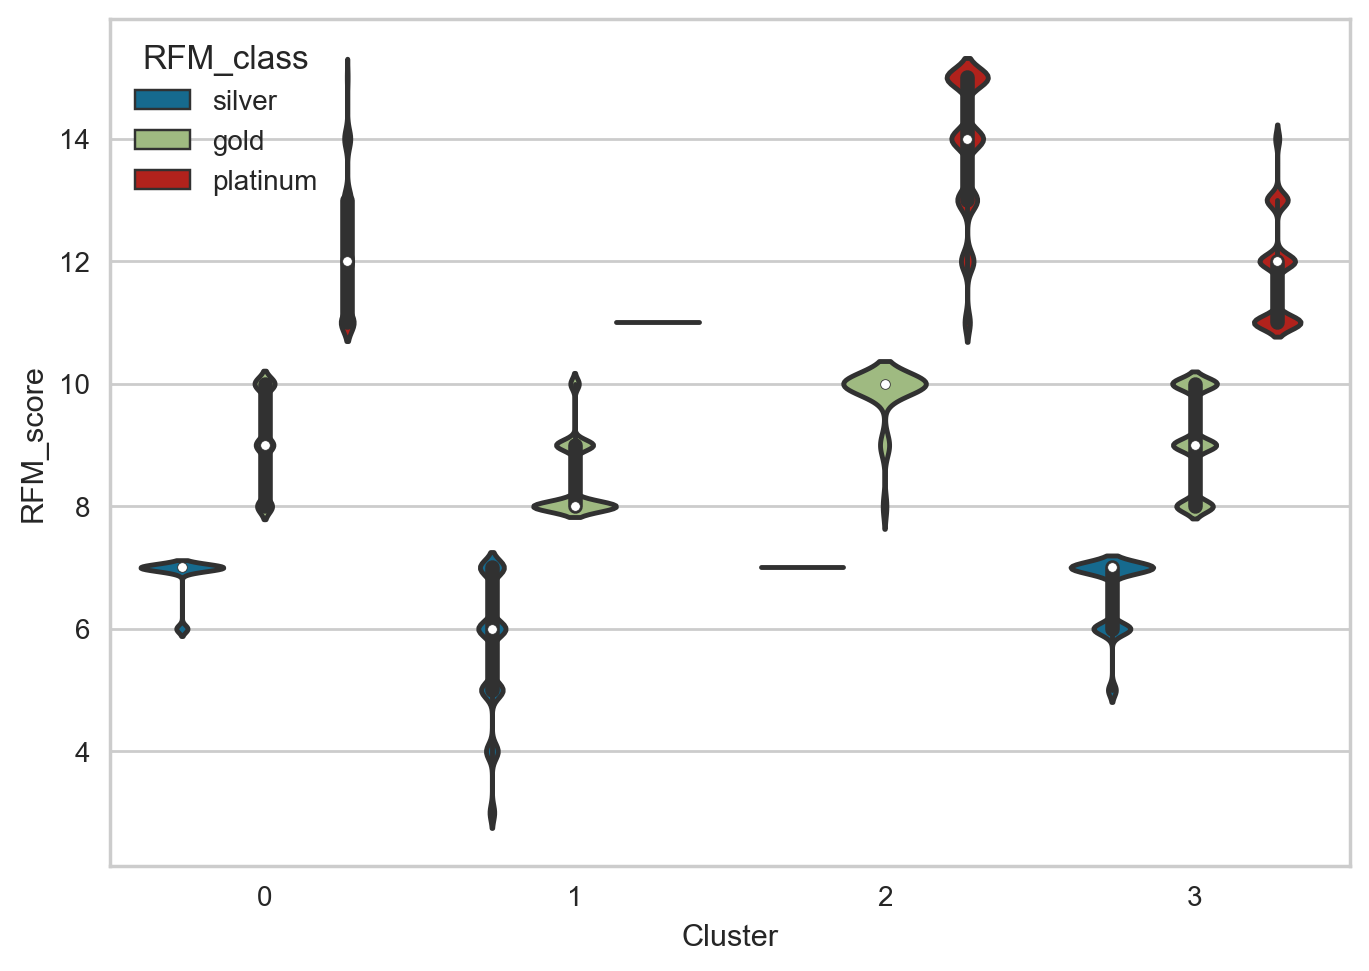

In [58]:
# RFM과 Clusters 시각화

sns.violinplot(data=rfm, x="Cluster", y="RFM_score", hue="RFM_class")

# 세부분석. 집단별 view, cart, purchase 비율 확인

## 사용할 df

In [59]:
display(rfm.shape)
display(rfm.head(2))

(228393, 10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
user_id,,,,,,,,,,
384989212,14,1,41.439999,3,1,1,311,5,silver,1
401021311,11,1,231.639999,3,1,3,313,7,silver,1


In [60]:
raw = raw.set_index("user_id") # user_id를 인덱스로 지정
display(raw.shape)
display(raw.head(2))

(22146517, 7)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
560842110,2019-10-16 12:04:37+00:00,view,7900918,2053013556487520725,furniture.kitchen.chair,joie,102.709999
560842739,2019-10-16 12:04:37+00:00,view,1003317,2053013555631882655,electronics.smartphone,apple,952.150024


##  rfm df에서 cluster 별 user_id 추출

In [61]:
# cluster n으로 분류된 user_id를 추출하는 함수

def cluster_user_id(n):
    cluster_user_id = rfm[rfm["Cluster"] == n].index.tolist()
    return cluster_user_id

In [62]:
# 반복문으로 cluster 0 ~ n까지 각 cluster에 속하는 user_id를 추출하기

user_id_list = []

for i in range(0, n_clusters):
    result = cluster_user_id(i)
    user_id_list.append(result)

In [63]:
# cluster별 user_id가 담긴 리스트 만들기

cluser_0_user_id = user_id_list[0]
cluser_1_user_id = user_id_list[1]
cluser_2_user_id = user_id_list[2]
cluser_3_user_id = user_id_list[3]
display(len(cluser_0_user_id))
display(len(cluser_1_user_id))
display(len(cluser_2_user_id))
display(len(cluser_3_user_id))

55713

82882

23241

66557

In [64]:
# raw df에서 cluster 0인 고객의 정보 가져오기
# 즉, sample df의 index가 cluser_0_user_id인 값만 가져오기

raw_cluster_0 = raw.loc[cluser_0_user_id]
raw_cluster_0.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
410333972,2019-10-31 12:28:58+00:00,view,1002528,2053013555631882655,electronics.smartphone,apple,617.52002
410333972,2019-10-31 12:30:40+00:00,view,1003304,2053013555631882655,electronics.smartphone,apple,591.25000


In [65]:
# sample df에서 cluster 1인 고객의 정보 가져오기

raw_cluster_1 = raw.loc[cluser_1_user_id]
raw_cluster_1.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
384989212,2019-10-18 10:58:52+00:00,view,2501799,2053013564003713919,appliances.kitchen.oven,elenberg,46.310001
384989212,2019-10-18 10:59:02+00:00,view,2501816,2053013564003713919,appliances.kitchen.oven,artel,41.439999


In [66]:
# sample df에서 cluster 2인 고객의 정보 가져오기

raw_cluster_2 = raw.loc[cluser_2_user_id]
raw_cluster_2.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
475786534,2019-10-01 05:45:17+00:00,view,3701141,2053013565983425517,appliances.environment.vacuum,tefal,239.130005
475786534,2019-10-01 05:46:04+00:00,view,3700412,2053013565983425517,appliances.environment.vacuum,thomas,334.600006


In [67]:
# sample df에서 cluster 3인 고객의 정보 가져오기

raw_cluster_3 = raw.loc[cluser_3_user_id]
raw_cluster_3.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price
user_id,,,,,,,
403013066,2019-10-18 19:04:29+00:00,view,1004836,2053013555631882655,electronics.smartphone,samsung,229.220001
403013066,2019-10-18 19:05:28+00:00,cart,1004836,2053013555631882655,electronics.smartphone,samsung,229.220001


In [68]:
# shape 확인

display(raw_cluster_0.shape)
display(raw_cluster_1.shape)
display(raw_cluster_2.shape)
display(raw_cluster_3.shape)

(1396279, 7)

(1886364, 7)

(1374239, 7)

(1623530, 7)

## Cluster별 고객의 view, cart, purchase 비율

In [69]:
# cluster가 0인 고객의 view, cart, purchase 비율

vcp_0 = raw_cluster_0["event_type"].value_counts(normalize=True)
vcp_0 = vcp_0.to_frame()
vcp_0 = vcp_0.rename(columns={"event_type":"cluster_0"})
vcp_0

,cluster_0
view,0.885188
cart,0.061064
purchase,0.053748


In [70]:
# cluster가 1인 고객의 view, cart, purchase 비율

vcp_1 = raw_cluster_1["event_type"].value_counts(normalize=True)
vcp_1 = vcp_1.to_frame()
vcp_1 = vcp_1.rename(columns={"event_type":"cluster_1"})
vcp_1

,cluster_1
view,0.898968
cart,0.054250
purchase,0.046782


In [71]:
# cluster가 2인 고객의 view, cart, purchase 비율

vcp_2 = raw_cluster_2["event_type"].value_counts(normalize=True)
vcp_2 = vcp_2.to_frame()
vcp_2 = vcp_2.rename(columns={"event_type":"cluster_2"})
vcp_2

,cluster_2
view,0.764577
purchase,0.126760
cart,0.108664


In [72]:
# cluster가 3인 고객의 view, cart, purchase 비율

vcp_3 = raw_cluster_3["event_type"].value_counts(normalize=True)
vcp_3 = vcp_3.to_frame()
vcp_3 = vcp_3.rename(columns={"event_type":"cluster_3"})
vcp_3

,cluster_3
view,0.847764
cart,0.080624
purchase,0.071612


In [73]:
# 시각화를 위한 df 만들기 - stacked bar

df_vcp = pd.concat([vcp_0, vcp_1, vcp_2, vcp_3], axis=1).T
df_vcp

,view,cart,purchase
cluster_0,0.885188,0.061064,0.053748
cluster_1,0.898968,0.054250,0.046782
cluster_2,0.764577,0.108664,0.126760
cluster_3,0.847764,0.080624,0.071612


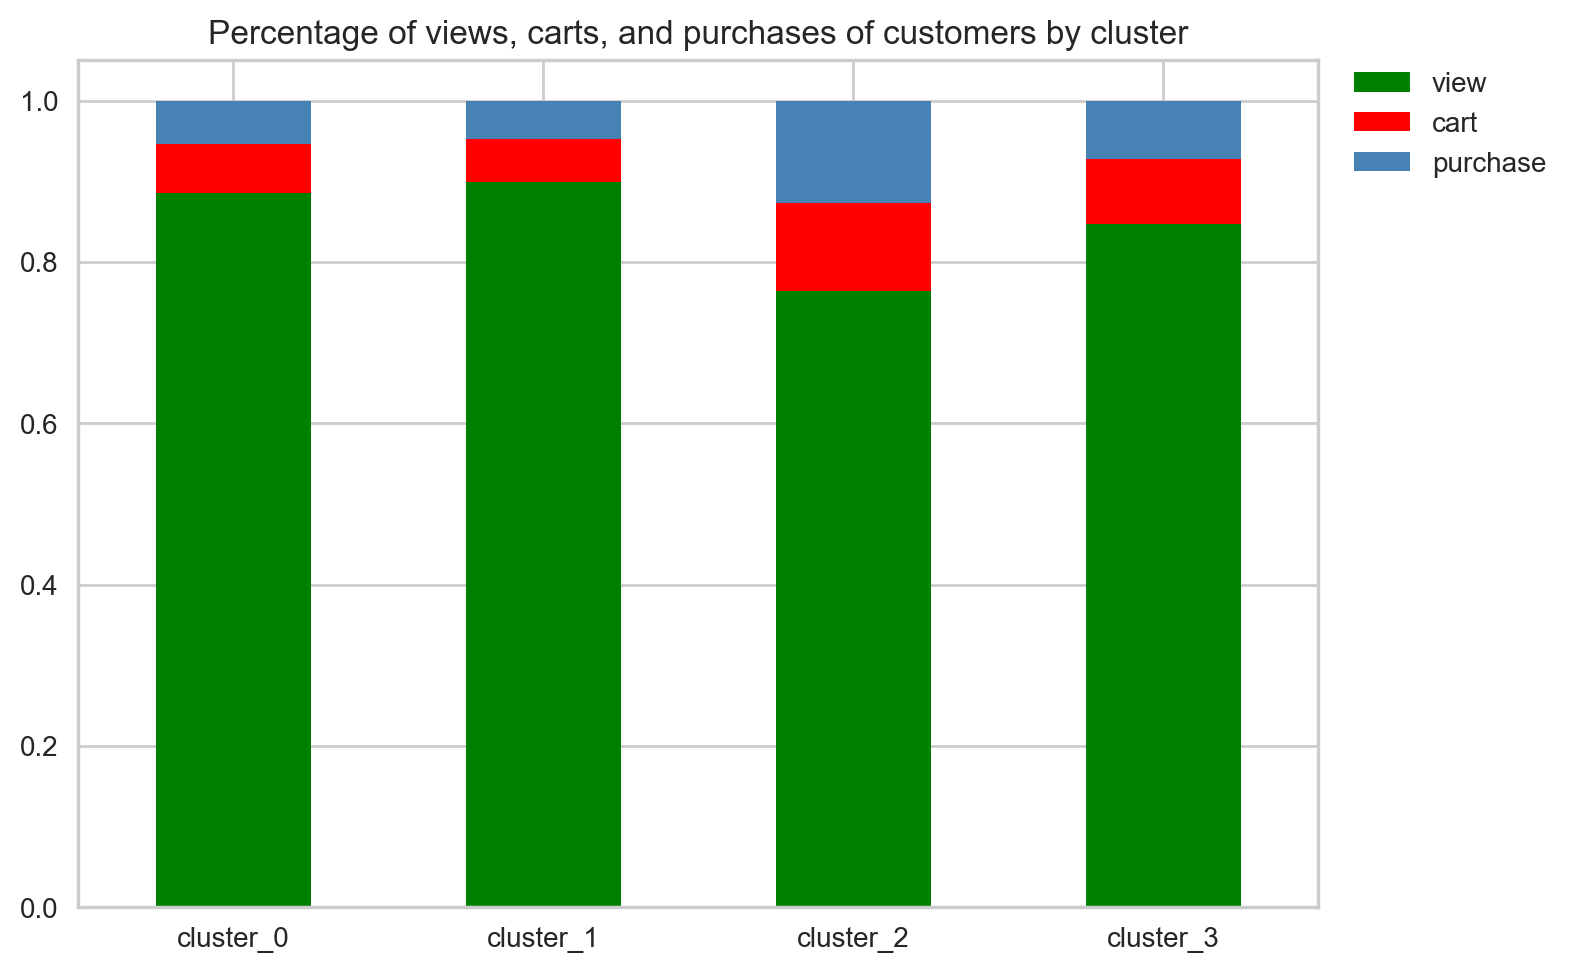

In [75]:
# 시각화 : Cluster별 고객의 view, cart, purchase 비율

df_vcp.plot(kind='bar',
             stacked=True,
             color=['green', 'red', 'steelblue'],
             rot=0
             ).set(title='Percentage of views, carts, and purchases of customers by cluster')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)